# Your first deep neural network

# imports

In [1]:
import keras.optimizers

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from keras.datasets import cifar10

# data

In [3]:
NUM_CLASSES = 10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [6]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [7]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


# train

In [9]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
model.fit(x_train,
          y_train,
          batch_size=32,
          epochs=10,
          shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8424 - accuracy: 0.3348
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6631 - accuracy: 0.4068
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5912 - accuracy: 0.4340
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5341 - accuracy: 0.4546
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4932 - accuracy: 0.4691
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4598 - accuracy: 0.4813
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4314 - accuracy: 0.4910
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4090 - accuracy: 0.4983
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3814 - accuracy: 0.5092
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.358

# analysis

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4237 - accuracy: 0.4982


[1.423740029335022, 0.498199999332428]

In [12]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

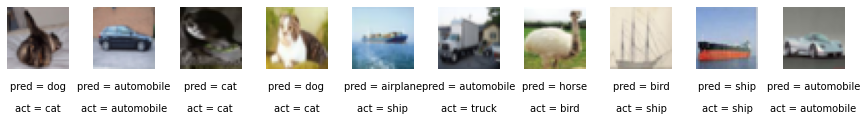

In [13]:

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)